In [1]:
from my_bert import *

2022-12-08 16:40:54.753201: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import pandas as pd
from ast import literal_eval
from bertopic import BERTopic
import numpy as np
import emoji
import re, string

In [3]:
with open('label0_not_RNN.npy', 'rb') as f:
  a = np.load(f)

with open('label1_gender_RNN.npy', 'rb') as f:
  b = np.load(f)

with open('label2_religion_RNN.npy', 'rb') as f:
  c = np.load(f)

with open('label3_other_RNN.npy', 'rb') as f:
  d = np.load(f)

with open('label4_age_RNN.npy', 'rb') as f:
  e = np.load(f)

with open('label5_ethnicity_RNN.npy', 'rb') as f:
  f = np.load(f)

In [4]:
#Clean emojis from text
def strip_emoji(text):
    return emoji.replace_emoji(text)
    # return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji
    
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split()]
    text = ' '.join(text)
    return text

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def clean_hashtags(tweet):
    # new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)


#Then we apply all the defined functions in the following order
def deep_clean(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    return text

In [6]:
gen_docs = [
    [deep_clean(x.split('\x1b[0m')[-1]) for x in a],
    [deep_clean(x.split('\x1b[0m')[-1]) for x in b],
    [deep_clean(x.split('\x1b[0m')[-1]) for x in c],
    [deep_clean(x.split('\x1b[0m')[-1]) for x in d],
    [deep_clean(x.split('\x1b[0m')[-1]) for x in e],
    [deep_clean(x.split('\x1b[0m')[-1]) for x in f]
]

In [7]:
# setup for training
docs_all = [item for sublist in gen_docs for item in sublist]

In [8]:
# topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
# topic_model, topics, probs = train_and_save(topic_model, docs_all)

In [9]:
topic_models = []
all_topics = []
all_probs = []

for curr_doc in gen_docs:
    curr_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
    curr_topic_model, curr_topics, curr_probs = train_and_save(curr_topic_model, curr_doc)
    
    topic_models.append(curr_topic_model)
    all_topics.append(curr_topics)
    all_probs.append(curr_probs)

Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-08 16:41:54,809 - BERTopic - Transformed documents to Embeddings
2022-12-08 16:42:01,733 - BERTopic - Reduced dimensionality
2022-12-08 16:42:01,799 - BERTopic - Clustered reduced embeddings


CPU Execution time: 45.866517316 seconds
Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-08 16:42:05,196 - BERTopic - Transformed documents to Embeddings
2022-12-08 16:42:08,691 - BERTopic - Reduced dimensionality
2022-12-08 16:42:08,765 - BERTopic - Clustered reduced embeddings


CPU Execution time: 36.331979372 seconds
Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-08 16:42:11,073 - BERTopic - Transformed documents to Embeddings
2022-12-08 16:42:14,134 - BERTopic - Reduced dimensionality
2022-12-08 16:42:14,221 - BERTopic - Clustered reduced embeddings


CPU Execution time: 20.116390847999995 seconds
Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-08 16:42:16,502 - BERTopic - Transformed documents to Embeddings
2022-12-08 16:42:20,217 - BERTopic - Reduced dimensionality
2022-12-08 16:42:20,280 - BERTopic - Clustered reduced embeddings


CPU Execution time: 25.556528158999996 seconds
Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-08 16:42:23,182 - BERTopic - Transformed documents to Embeddings
2022-12-08 16:42:26,516 - BERTopic - Reduced dimensionality
2022-12-08 16:42:26,584 - BERTopic - Clustered reduced embeddings


CPU Execution time: 30.53885578699999 seconds
Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-08 16:42:29,304 - BERTopic - Transformed documents to Embeddings
2022-12-08 16:42:33,195 - BERTopic - Reduced dimensionality
2022-12-08 16:42:33,260 - BERTopic - Clustered reduced embeddings


CPU Execution time: 33.641018186 seconds


In [11]:
notcyber = """bullying,de,que,eu,se,isso,bulling,por,com,el
bully,bullied,bullying,video,stop,he,to,you,your,schools
school,college,high,go,to,break,at,am,do,back
andre,kat,mkr,and,amp,are,they,hope,fuck,be
mkr,bless,two,masterchef,fuck,round,what,oh,dee,background
twitter,tweet,tweets,facebook,past,to,on,you,is,tweeting
women,men,yesallwomen,woman,are,rt,feminists,tech,not,to
islam,muslim,muslims,islamic,of,mohammed,religion,rt,is,what
blahhh,va,excellent,wow,good,more,,,,
evidence,article,stupid,false,conspiracy,data,that,you,idiot,brain
class,classes,teacher,algebra,my,in,hate,go,math,course
colin,mkr,robert,fassnidge,tasteofsydney,his,tsk,shirt,collin,host
breakfast,chicken,meatballs,mkr,livers,liver,pizza,egg,food,dinner
rt,yrs,tone,1600,takedown,this,see,joke,oh,rts
kat,fair,mkr,she,score,her,strategically,hypocrite,bloody,is
annie,lloyd,celine,vicky,mkr,amp,sudden,and,based,emile
blocked,ggautoblocker,bot,block,spam,user,tech,email,account,have
instant,restaurants,restaurant,round,another,kitchen,rounds,mkr,hq,four
putin,russia,troll,ukraine,russian,nazi,nazis,propaganda,trolls,ukrainians
gamergate,ethics,harassment,journalism,blacklisted,about,attached,is,amusing,that"""

gender = """jokes,gay,rape,joke,funny,and,are,you,my,friends
he,his,him,made,and,rape,jokes,gay,hes,was
females,call,bitches,bitch,female,dont,when,you,them,us
kat,mkr,face,karma,awful,off,oh,smile,slap,eyes
jokes,funny,racist,make,black,race,white,people,about,laugh
insult,an,as,use,people,word,gay,retarded,make,using
prison,rape,jail,gay,joke,funny,jokes,sex,is,in
she,her,made,shes,said,as,rape,and,prison,was
feminism,feminists,feminist,womenagainstfeminism,rt,feminismisawful,equality,actually,movement,feministsareugly
driving,drive,drivers,rt,notsexist,sexist,am,woman,but,women
sexist,am,rt,but,women,not,stupid,should,just,girls
fucking,colleague,female,bitch,call,colleagues,work,coworker,coworkers,your
joke,raped,being,is,sin,rape,gay,not,sex,it
sports,commentators,announcers,rt,sexist,commentator,announcer,football,stand,am
female,fucking,congress,bitch,member,republican,yoho,call,congressman,ted
feminazi,arguing,eating,2to,activate,adlfringe,antifeminazi,321,alkjaskljkgljdfkjdflkhjfgh,letter
sports,basketball,sexist,rt,women,hockey,but,tennis,watch,am
dog,dogs,female,bitch,call,loyal,her,mother,bitches,you
sexist,men,women,be,man,it,homophobic,for,can,is
football,sexist,girls,rt,should,am,but,women,commentating,not"""

religion = """support,radical,christians,christian,trump,the,to,who,and,of
black,racist,idiots,you,white,the,blm,are,idiot,racism
quran,isis,terrorists,terrorist,read,islam,they,the,al,and
jihad,humanity,terrorists,terrorist,against,of,name,is,the,they
terrorism,islamic,ur,world,radical,it,is,of,hv,all
woman,right,christian,good,my,she,her,me,im,now
israel,palestine,palestinians,palestinian,hamas,jews,gaza,the,honor,israelis
hindus,hindu,idiots,you,are,muslims,idiot,muslim,or,and
china,chinese,camps,concentration,idiot,muslims,you,are,in,of
kashmir,kashmiri,pandits,terrorism,islamic,kashmiris,india,in,we,of
she,her,muslim,idiot,is,you,and,not,to,what
turkey,erdogan,turkish,turks,greece,sophia,libya,egypt,in,hagia
jews,jewish,muslims,the,buddhists,christians,holocaust,world,and,all
slavery,slaves,slave,africa,sold,the,mohammed,slavers,today,still
declared,1400,war,ago,years,humanity,islam,on,mankind,all
obama,he,soros,was,muslim,idiots,president,brotherhood,the,obamas
hindutva,terrorism,islamic,hindu,hinduism,ur,world,not,hindus,term
israel,jewish,support,jews,radical,christians,antisemitic,amp,christian,us
women,islam,stay,cover,tells,men,beating,abuse,home,their
bjp,modi,congress,vote,india,for,idiot,congressi,muslims,is"""

other = """twitter,tweets,tweet,accounts,clients,tweetdeck,hashtag,have,from,with
bro,yisssss,yolo,dara,county,yo,er,awww,hat,vs
bully,lol,xd,me,you,lmao,im,am,hahaha,aha
rt,announce,harder,here,rinse,brf,avengers,questionsformen,fml,screenshot
bullied,bullying,school,being,got,me,cont,getting,im,been
feminazi,called,use,limbaugh,word,term,stoprush,nags,rush,using
gamergate,harassment,gaming,gamergaters,is,antiharassment,from,abuse,their,not
play,wow,pvp,bgs,arenas,blizzard,shadow,games,playing,game
socks,shoes,pants,sneakers,jeans,wear,jc,85,museum,leggings
amp,about,to,are,is,that,abuse,people,best,male
she,her,bullying,bullied,bully,selena,school,girl,by,said
bully,big,bullying,drillbit,nerds,taylor,biggest,bullies,he,either
patreon,nonprofit,npo,funding,rapids,charity,companies,pay,donations,fees
problem,experiences,talk,abt,talking,voice,of,am,people,more
instant,mkr,restaurants,round,restaurant,kitchen,another,dessert,lemon,looks
wadhwa,stopwadhwa2015,npr,women,tech,disappointed,vivek,tarah,book,him
scared,life,ever,story,scare,think,scary,rough,old,horror
women,tech,sexism,industry,woman,strong,sexist,rt,female,engineer
harassment,harassed,online,targeted,of,community,harassmentstalking,mean,speech,resource
sleep,slept,cry,tired,kaiser,nap,sleeping,bed,hope,day"""

age = """middle,bully,school,you,my,bullies,ur,like,lol,now
gay,lesbian,being,homophobic,was,for,me,bi,and,bullied
girl,she,me,her,who,this,bullied,high,in,my
girls,me,im,now,bullied,who,are,high,in,school
she,her,is,bully,was,girl,high,school,mean,in
black,white,was,by,girls,bullied,my,and,because,high
nurses,nursing,nurse,who,girls,becoming,became,bullied,mean,are
schools,trump,open,reopen,reopening,safe,cdc,opening,into,to
facebook,fb,page,on,me,request,friend,who,girl,high
these,bullies,fucking,are,exposing,screenshots,high,school,they,video
luca,you,bullies,your,will,are,it,strong,let,to
cops,police,cop,are,they,officers,the,bullies,law,enforcement
he,his,him,was,bully,up,had,the,amp,school
fat,weight,skinny,for,being,bullied,now,high,girls,in
wore,wearing,dress,clothes,wear,bought,girls,got,uniform,glasses
hair,long,my,dyed,girls,in,me,bullied,having,high
movie,tall,netflix,is,about,girl,gets,this,for,the
trump,he,is,him,his,yard,president,donald,bully,has
tall,height,taller,short,get,being,girl,was,bullied,for
twitter,tweet,tweets,tweeted,me,girls,bullied,high,account,tweeting"""

ethnicity = """first,ur,one,my,of,love,the,so,and,to
negro,called,white,black,people,the,was,man,by,it
disgusting,black,people,word,is,it,calling,and,person,niggers
white,black,dumb,you,niggers,fuck,racist,yall,say,call
niggers,dumb,fuck,these,some,as,fucks,are,they,hate
colored,racism,ppl,people,not,know,is,racist,color,to
rt,jags,fuck,dumb,youltwow,nigger,suck,niggers,smh,lol
she,her,bitch,dumb,said,girl,fuck,nigger,that,as
she,obama,mad,rt,her,ass,bitch,fuck,nigger,dumb
past,anything,black,people,we,history,to,in,the,about
you,nigger,fuck,dumb,ass,your,mofo,fucking,bitch,ya
blm,past,anything,lives,black,the,been,in,has,about
mad,rt,obama,ass,awwww,nigger,fuck,dumb,lol,lmao
obama,ass,nigger,dumb,fuck,smh,lt,hater,president,yourself
twitter,tweet,tweeting,tweets,niggers,fuck,dumb,shit,you,like
rt,obama,ass,nigger,fuck,dumb,niggerltltltltdis,lt,turn,smh
mad,obama,ass,nigger,fuck,dumb,stay,bitch,lol,af
incident,pick,racism,was,not,the,choose,to,at,on
he,his,anything,past,him,hes,kanye,trump,racist,black
shut,up,you,fuck,nigger,dumb,the,your,shit,ratchet"""
og = [notcyber, gender, religion, other, age, ethnicity]

In [13]:
rnn_topics = []
for topic_model in topic_models:
    topics = []
    for i in range(20):
        topic = topic_model.get_topic(i)
        if topic != False:
            topics.append([x[0] for x in topic])
    rnn_topics.append(topics)

In [14]:
for i in range(6):
    s = set()
    l1 = [item for sublist in rnn_topics[i] for item in sublist]
    l2 = og[i].split(',')
    for ll1 in l1:
        if ll1 in l2:
            s.add(ll1)
    lll = list(s)
    print(', '.join(lll))

is, you, that, rt, troll, bullying, in, woman, on, and, mkr, of, que, are, not, kat, to
and, are, is, it, female, call, jokes, rt, you, am, joke, not, for, bitch, sexist, gay, rape, but, her
slaves, muslim, palestine, and, of, are, who, muslims, islamic, is, idiot, india, it, you, in, the, not, he, for, we, idiots, christian, to
is, you, that, about, am, of, to
is, me, in, they, school, high, bullied, my, on, and, the, was
ass, and, are, of, dumb, is, fucking, fuck, as, nigger, you, rt, niggers, in, my, the, black, not, that, obama, her, to


Training model with 5400 docs


Batches:   0%|          | 0/169 [00:00<?, ?it/s]

2022-12-02 21:19:33,052 - BERTopic - Transformed documents to Embeddings
2022-12-02 21:19:44,476 - BERTopic - Reduced dimensionality
2022-12-02 21:19:44,877 - BERTopic - Clustered reduced embeddings


CPU Execution time: 140.85250845899986 seconds


/opt/apps/Module/jupyterhub/2021.11/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



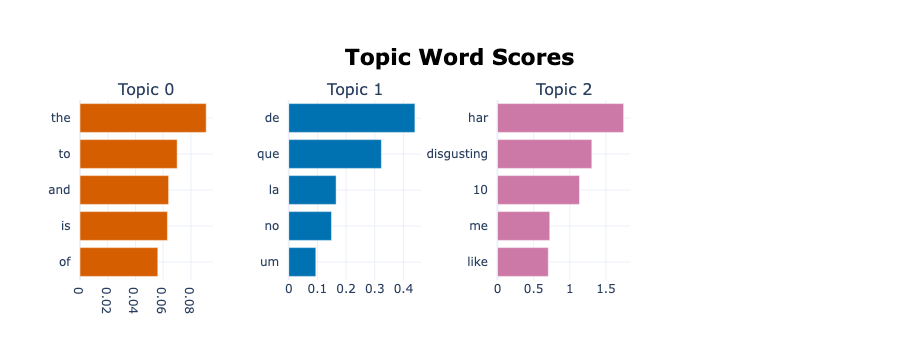

In [57]:
# we are unsure why the whole corpus does not generate more coherent topics when subsets of this corpus does
# it could be the inclusion of not_cyberbullying texts makes the topics too sparse for the model to classify

# sometimes the topic modeling doesn't get as many topics and focuses on words like you, the, and so we rerun it until we get good topics
# not getting enough topics only seems to affect generated text using raw tweet text (non deep_cleaned) as input
# we believe the cleaned text is more coherent for GPT-J to understand without unecessary punctuation and thus it provides us better generation

raw_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
raw_topic_model, _, _ = train_and_save(temp_model, raw_docs_all)

raw_topic_model.visualize_barchart(top_n_topics=20)



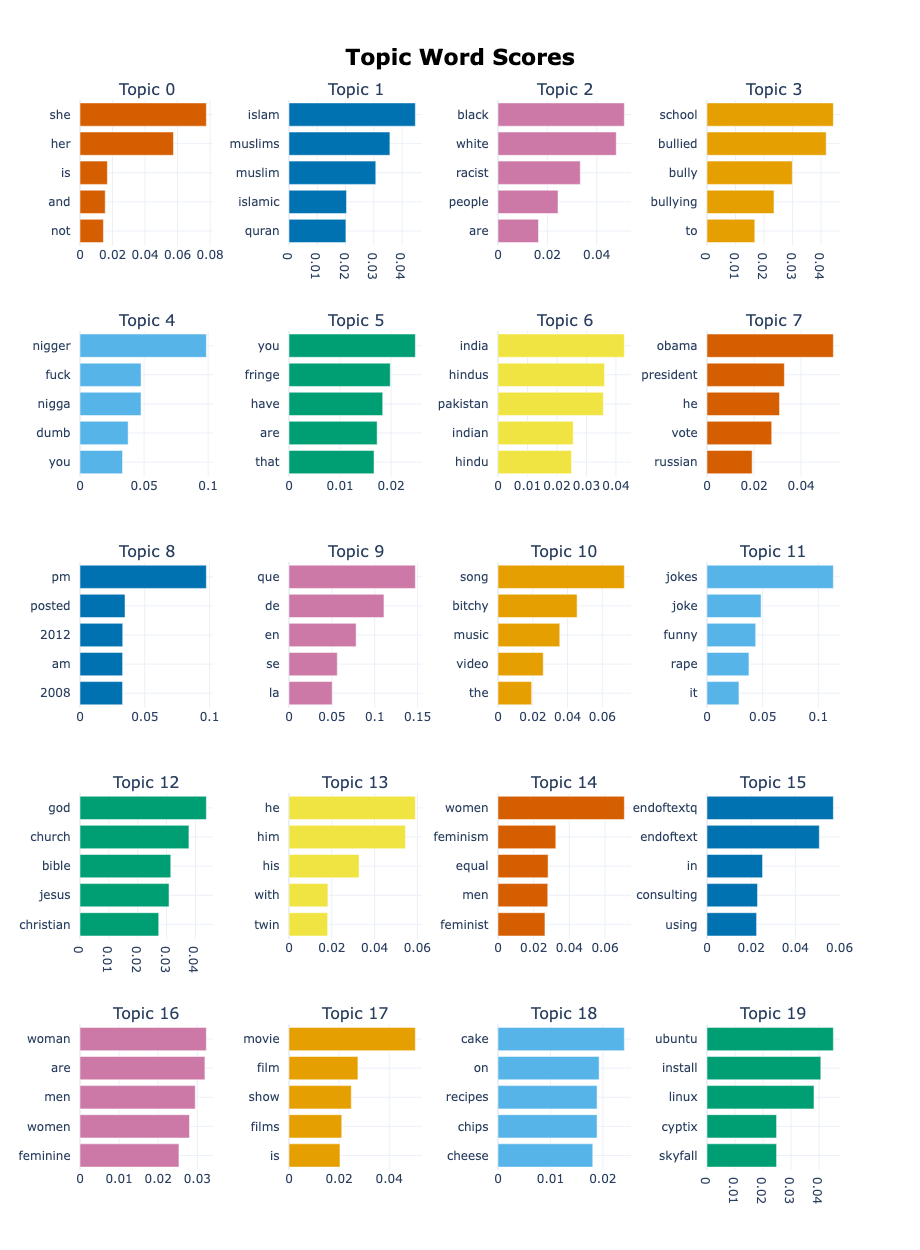

In [11]:
cleaned_topic_model.visualize_barchart(top_n_topics=20)

Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-02 21:12:45,111 - BERTopic - Transformed documents to Embeddings
2022-12-02 21:12:48,098 - BERTopic - Reduced dimensionality
2022-12-02 21:12:48,158 - BERTopic - Clustered reduced embeddings


CPU Execution time: 18.35363117199995 seconds
endoftext
Can't wait until I get more data on this. But it looks like @spacekatgal should probably avoid her mentions at 8-10AM PDT Sundays. ;)<|endoftext|>


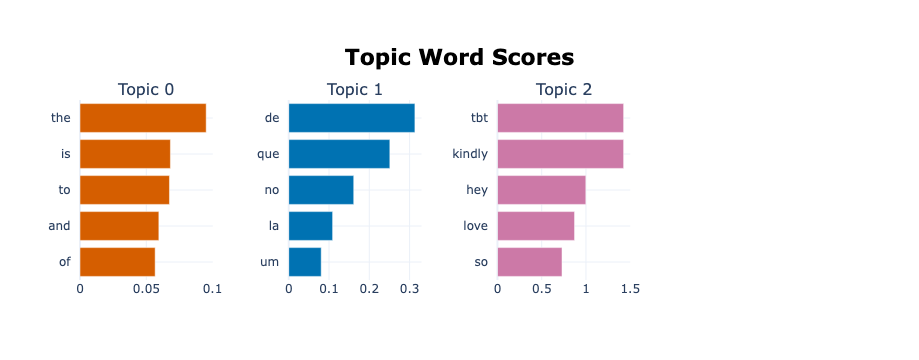

In [52]:
# we believe there is too many topics in the not_cyberbullying label to generate coherent topics

raw_topic_models[0] = BERTopic(language="english", calculate_probabilities=True, verbose=True)
raw_topic_models[0], _, _ = train_and_save(temp_model, raw_gen_docs[0])

print(raw_docs_all[15])
print(raw_gen[0][15])

raw_topic_models[0].visualize_barchart(top_n_topics=20)

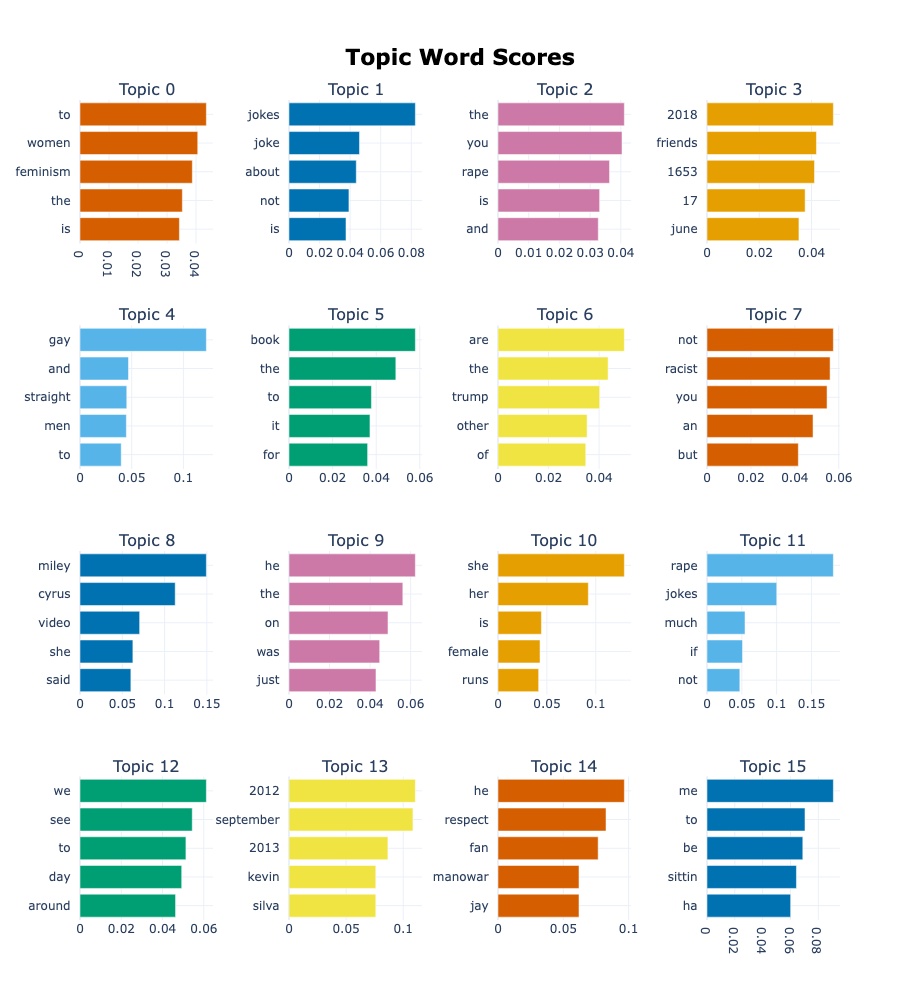

In [13]:
raw_topic_models[1].visualize_barchart(top_n_topics=20)

Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-02 21:16:59,363 - BERTopic - Transformed documents to Embeddings
2022-12-02 21:17:02,481 - BERTopic - Reduced dimensionality
2022-12-02 21:17:02,557 - BERTopic - Clustered reduced embeddings


CPU Execution time: 19.04551893300004 seconds


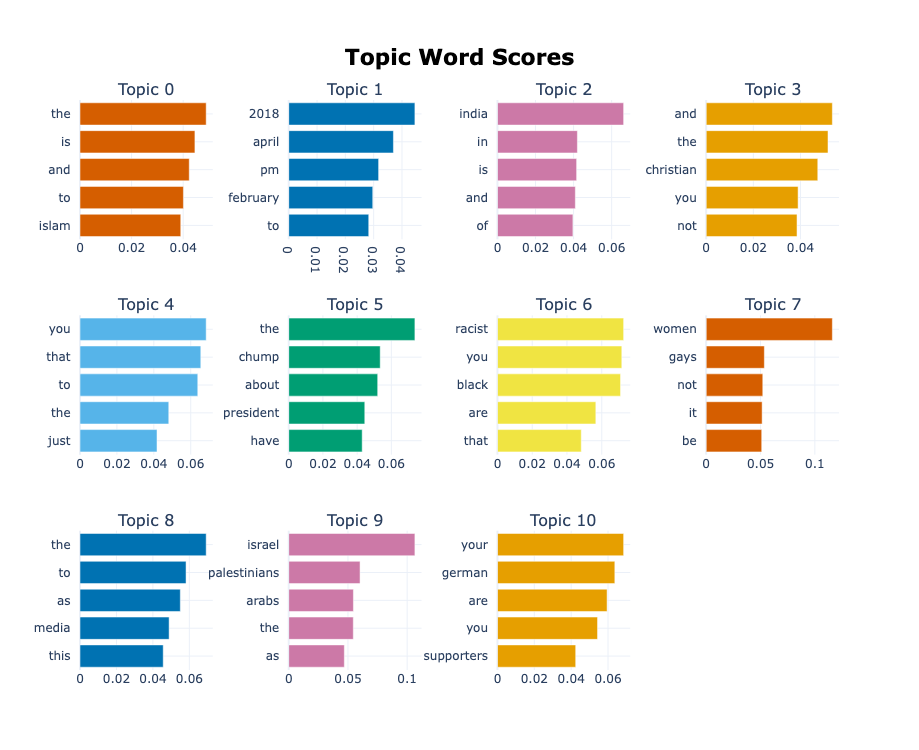

In [55]:
raw_topic_models[2] = BERTopic(language="english", calculate_probabilities=True, verbose=True)
raw_topic_models[2], _, _ = train_and_save(temp_model, raw_gen_docs[2])

raw_topic_models[2].visualize_barchart(top_n_topics=20)

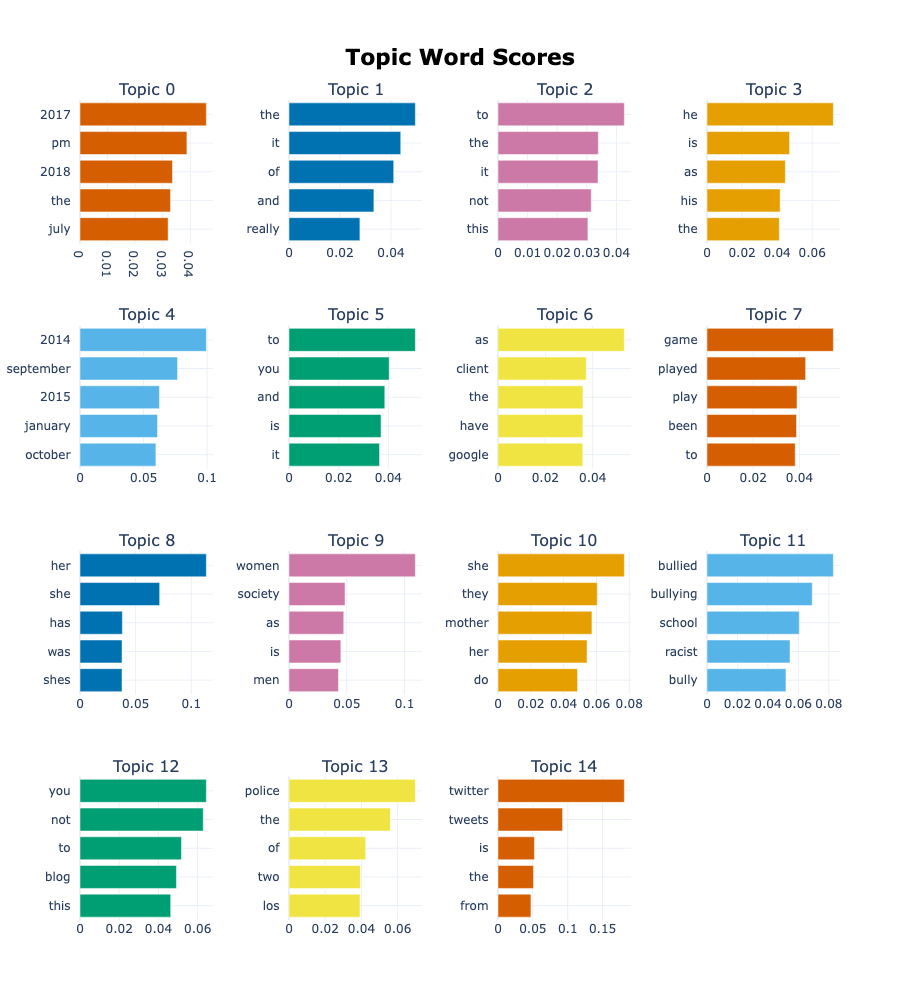

In [15]:
raw_topic_models[3].visualize_barchart(top_n_topics=20)

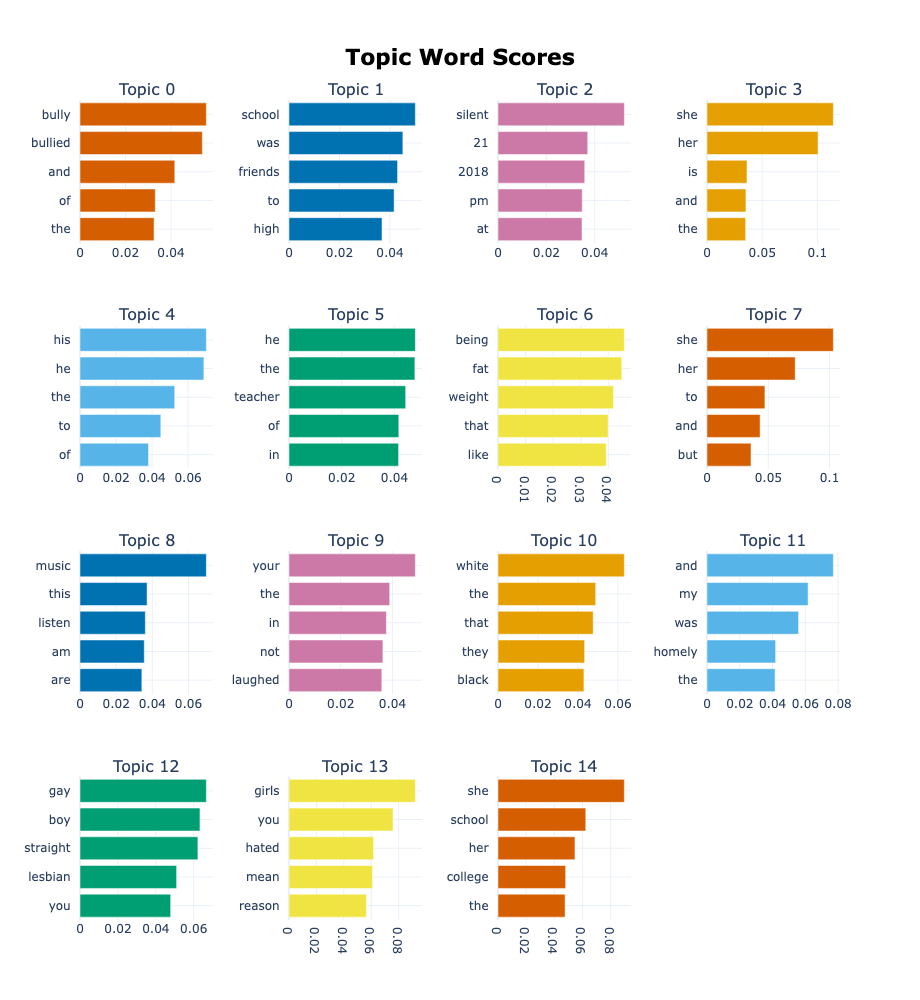

In [16]:
raw_topic_models[4].visualize_barchart(top_n_topics=20)

Training model with 900 docs


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

2022-12-02 21:17:27,492 - BERTopic - Transformed documents to Embeddings
2022-12-02 21:17:30,971 - BERTopic - Reduced dimensionality
2022-12-02 21:17:31,044 - BERTopic - Clustered reduced embeddings


CPU Execution time: 18.65097368099987 seconds


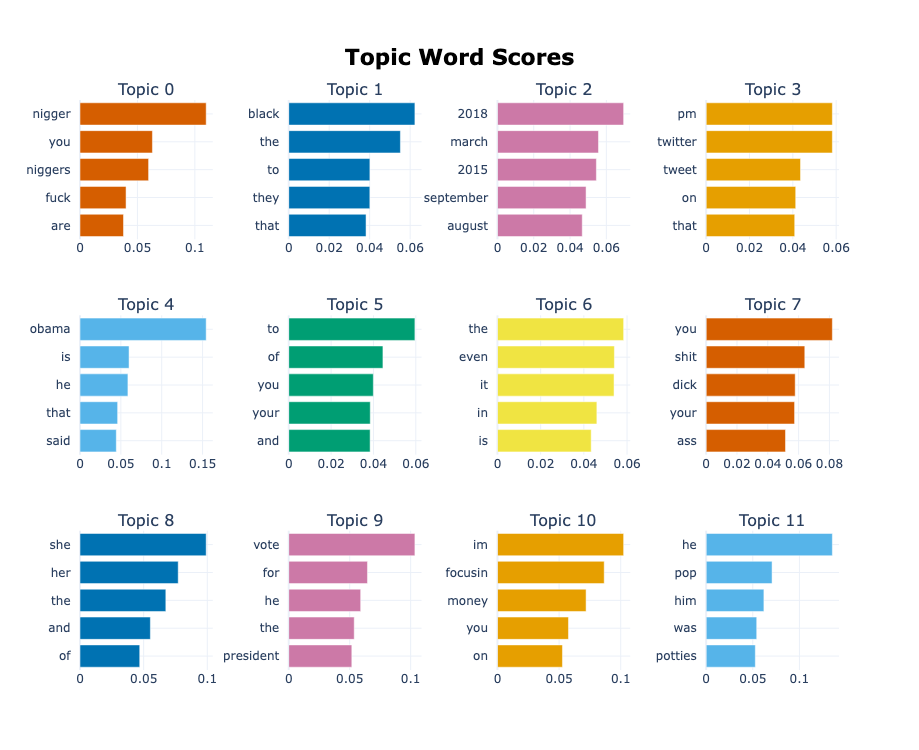

In [56]:
raw_topic_models[5] = BERTopic(language="english", calculate_probabilities=True, verbose=True)
raw_topic_models[5], _, _ = train_and_save(temp_model, raw_gen_docs[5])

raw_topic_models[5].visualize_barchart(top_n_topics=20)

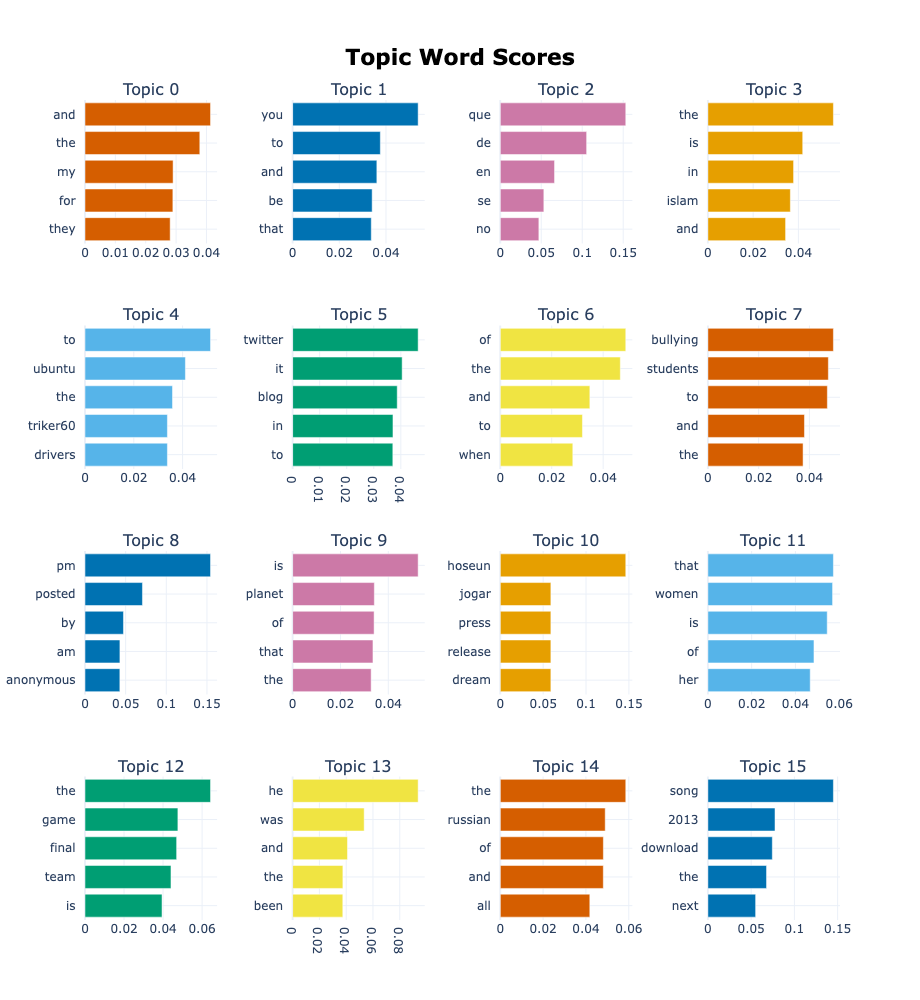

In [18]:
cleaned_topic_models[0].visualize_barchart(top_n_topics=20)

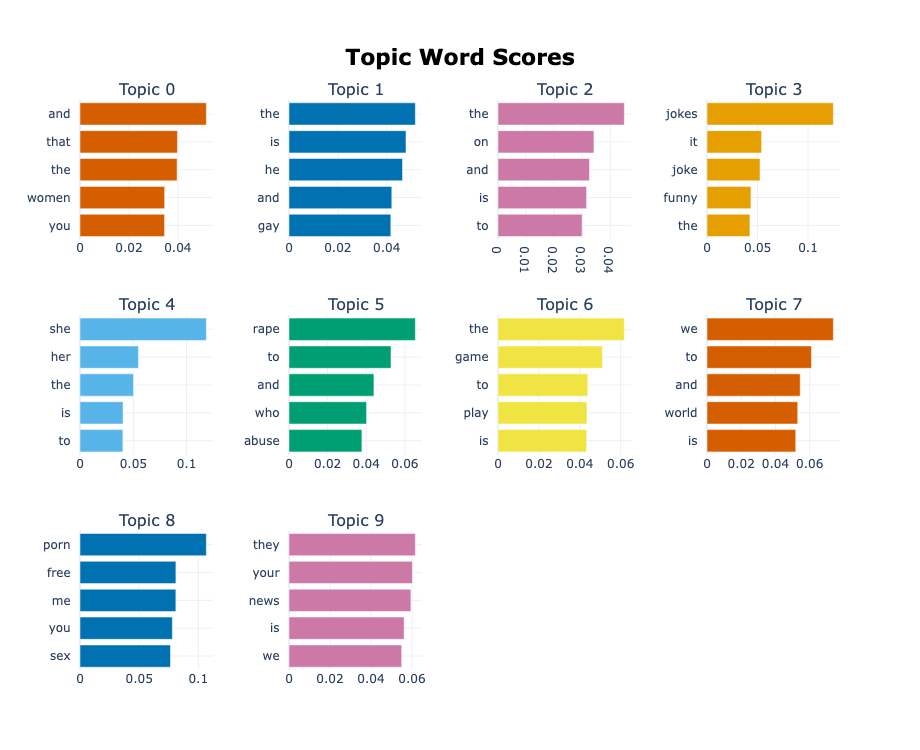

In [19]:
cleaned_topic_models[1].visualize_barchart(top_n_topics=20)

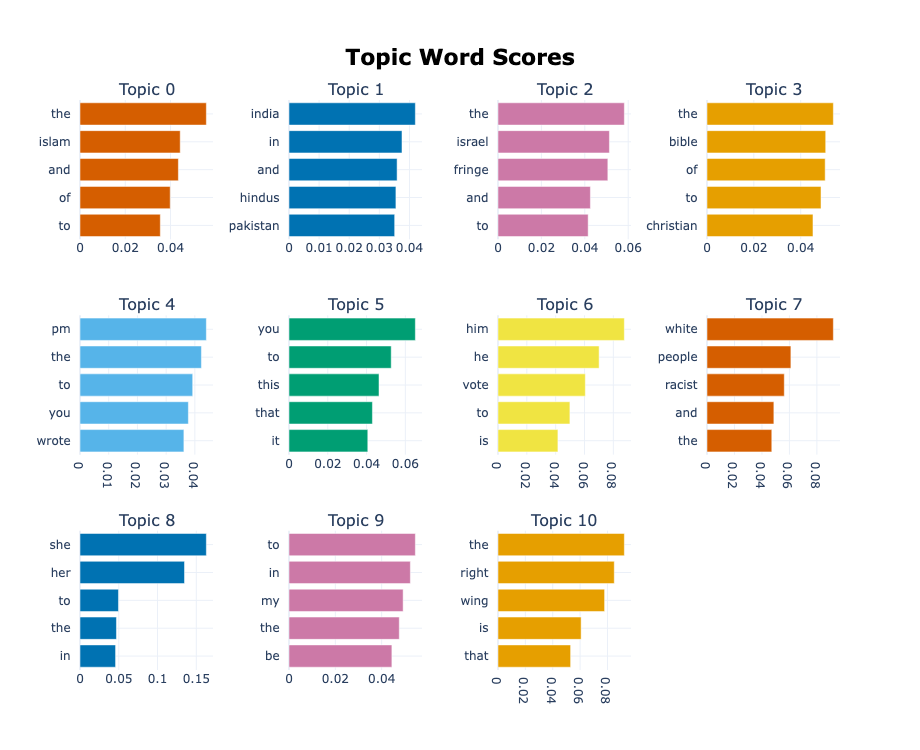

In [20]:
cleaned_topic_models[2].visualize_barchart(top_n_topics=20)

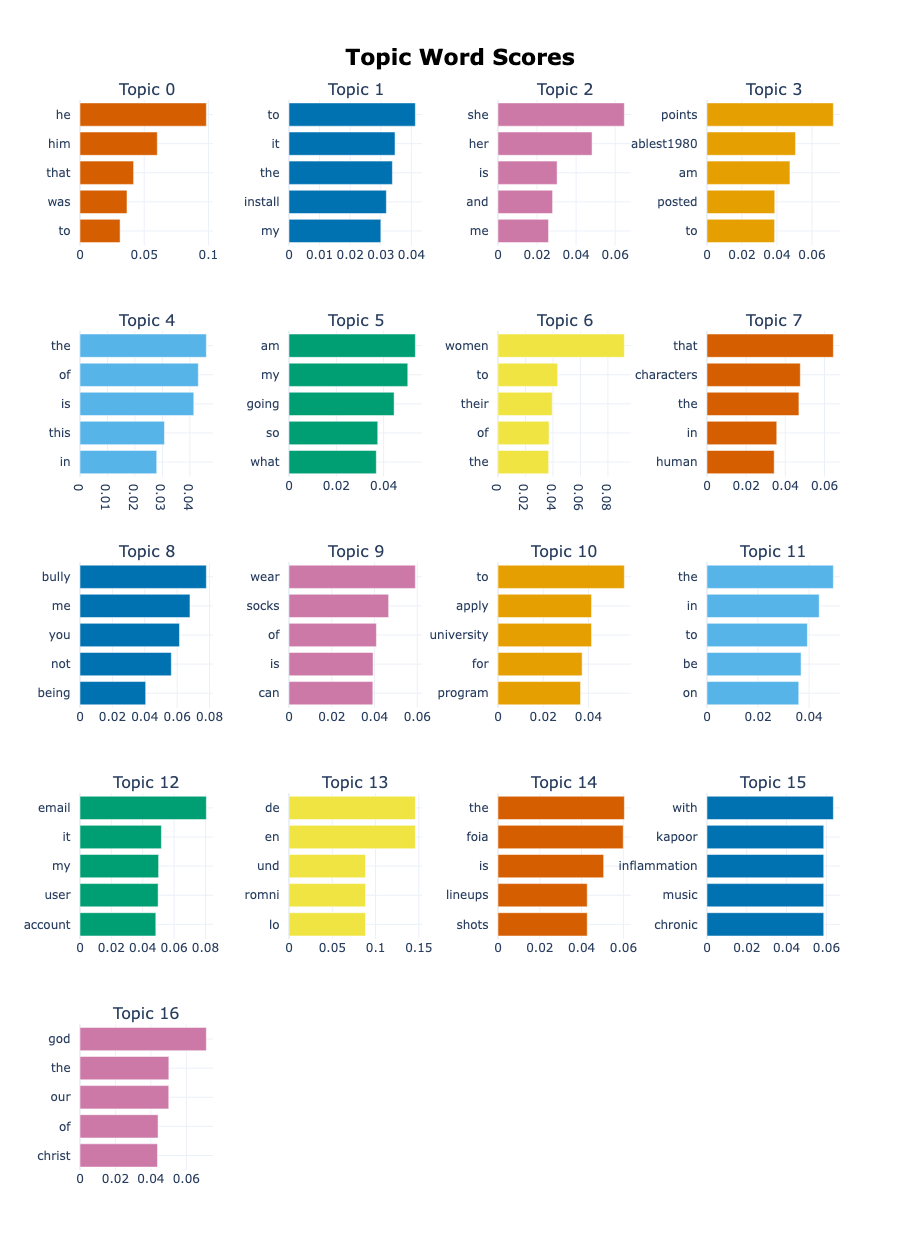

In [21]:
cleaned_topic_models[3].visualize_barchart(top_n_topics=20)

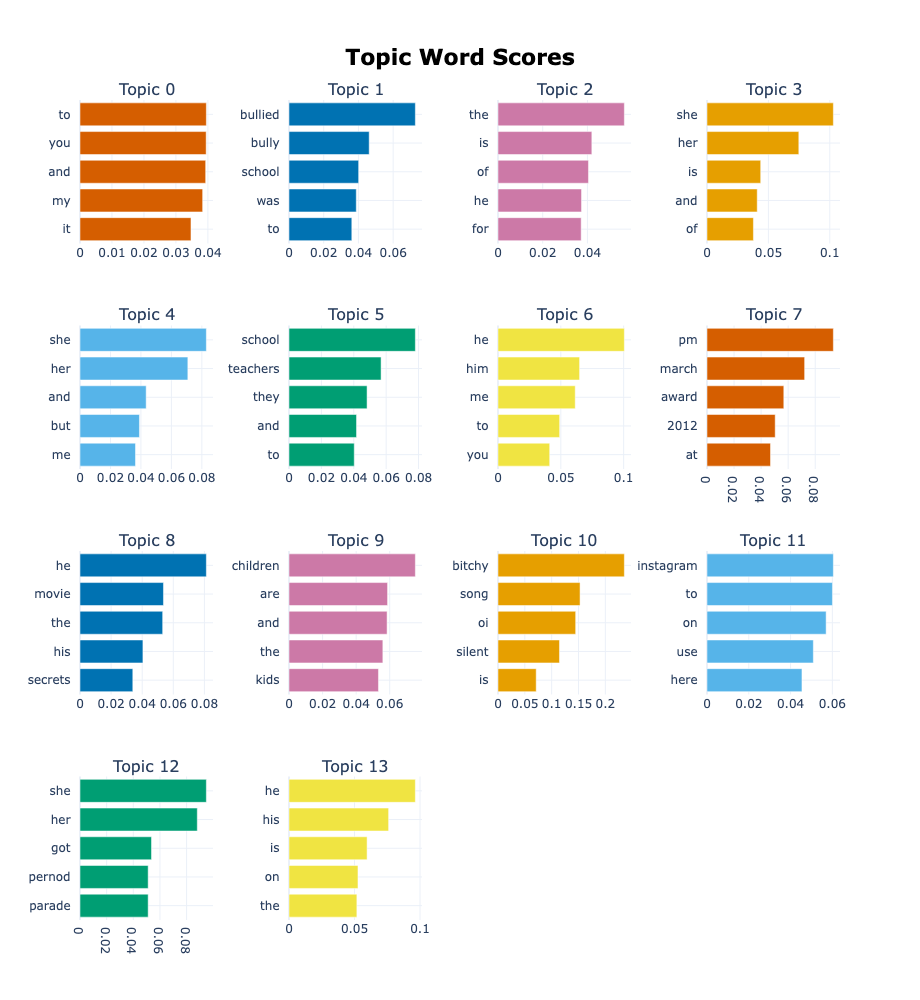

In [22]:
cleaned_topic_models[4].visualize_barchart(top_n_topics=20)

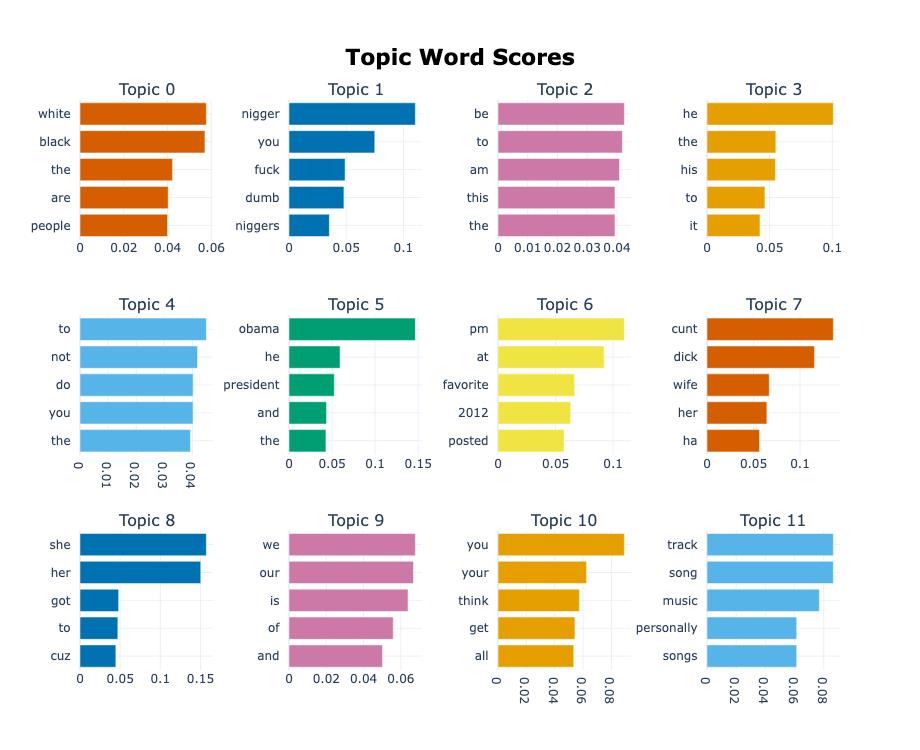

In [23]:
cleaned_topic_models[5].visualize_barchart(top_n_topics=20)